In [1]:
# Hace una regresión lineal con
# intervalos de confianza.

import numpy as np

from scipy import stats

from matplotlib import pyplot as plt

In [2]:
x = np.arange(1, 11, 1)
y = np.array([6.7, 4.7,  8.1, 7.1, 11.3,
    10.5, 11.8, 13.7, 10.6, 13.3])
z = np.array([3.9, 1.5, -0.2,    1, 0.6,
    -3.1, -2.8, -1.8,   -6,   -5])

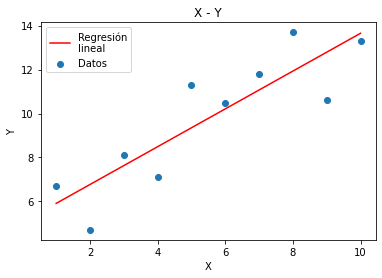

In [3]:
# Regresión lineal.
lin_reg = stats.linregress(x, y)

# Y gorro.
y_reg = ( lin_reg.intercept +
    lin_reg.slope * x )

fig, ax = plt.subplots()

# Se grafican los valores.
ax.scatter(x, y)
ax.plot(x, y_reg, color = "r")

ax.set_title("X - Y")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend(["Regresión\nlineal", "Datos"])

In [4]:
# ANOVA

SST_y = ( ( y - y.mean() ) ** 2 ).sum()
SSR_y = ( ( y_reg - y.mean() ) ** 2 ).sum()
SSE_y = ( ( y - y_reg ) ** 2 ).sum()
Se_y = np.sqrt(SSE_y / (y.shape[0] - 2 ))
R = SSR_y / SST_y
F = SSR_y / Se_y ** 2
alpha = 5 / 100
F_crit_y = stats.f.ppf( 1 - alpha, 1,
    y.shape[0] - 2 )
p = stats.f.cdf( F, 1,
    y.shape[0] - 2 )
t_crit_y = stats.t.ppf( 1 - alpha/2,
    y.shape[0] - 2 )
t_sb_y = ( t_crit_y * Se_y / np.sqrt(
    ( ( x - x.mean() ) ** 2 ).sum()
    * (y.shape[0] - 2) ) )

print(f"X_mean:  {x.mean():.3f}")
print(f"Y_mean:  {y.mean():.3f}")
print(f"SST:    {SST_y:.3f}")
print(f"SSR:    {SSR_y:.3f}")
print(f"SSE:    {SSE_y:.3f}")
print(f"RMSE:    {Se_y:.3f}")
print(f"R:       {R:.3f}")
print(f"F:      {F:.3f}")
print(f"F_crit:  {F_crit_y:.3f}")
print(f"p:       {p:.3f}")
print(f"t_crit:  {t_crit_y:.3f}")
print(f"t_sb:    {t_sb_y:.3f}")

X_mean:  5.500
Y_mean:  9.780
SST:    80.636
SSR:    61.103
SSE:    19.533
RMSE:    1.563
R:       0.758
F:      25.026
F_crit:  5.318
p:       0.999
t_crit:  2.306
t_sb:    0.140


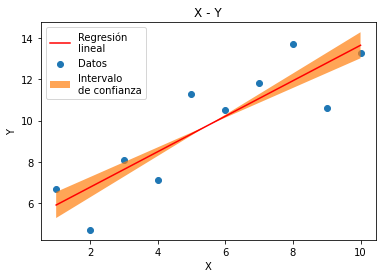

In [5]:
# Intervalos de confianza
y_t1 = ( ( lin_reg.slope - t_sb_y )
    * ( x - x.mean() ) + y.mean() )
y_t2 = ( ( lin_reg.slope + t_sb_y )
    * ( x - x.mean() ) + y.mean() )

fig, ax = plt.subplots()

# Se grafican los valores.
ax.scatter(x, y)
ax.plot(x, y_reg, color = "r")
ax.fill_between(x, y_t1, y_t2, alpha = 0.7)

ax.set_title("X - Y")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend(["Regresión\nlineal",
    "Datos", "Intervalo\nde confianza"])

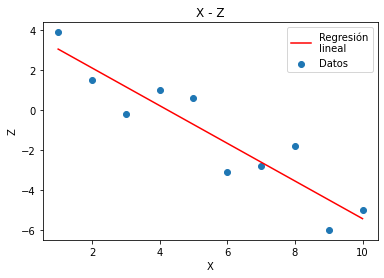

In [6]:
# Regresión lineal.
lin_reg = stats.linregress(x, z)

# Z gorro.
z_reg = lin_reg.intercept + lin_reg.slope * x

fig, ax = plt.subplots()

# Se grafican los valores.
ax.scatter(x, z)
ax.plot(x, z_reg, color = "r")

ax.set_title("X - Z")
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.legend(["Regresión\nlineal", "Datos"])

In [7]:
# ANOVA

SST_z = ( ( z - z.mean() ) ** 2 ).sum()
SSR_z = ( ( z_reg - z.mean() ) ** 2 ).sum()
SSE_z = ( ( z - z_reg ) ** 2 ).sum()
Se_z = np.sqrt(SSE_z / (z.shape[0] - 2 ))
R_z = SSR_z / SST_z
F_z = SSR_z / Se_z ** 2
alpha = 5 / 100
F_crit_z = stats.f.ppf( 1 - alpha, 1,
    z.shape[0] - 2 )
p = stats.f.cdf( F, 1,
    z.shape[0] - 2 )
t_crit_z = stats.t.ppf( 1 - alpha/2,
    z.shape[0] - 2 )
t_sb_z = ( t_crit_z * Se_z / np.sqrt(
    ( ( x - x.mean() ) ** 2 ).sum()
    * (z.shape[0] - 2) ) )

print(f"X_mean:  {x.mean():.3f}")
print(f"_mean:  {z.mean():.3f}")
print(f"SST:    {SST_z:.3f}")
print(f"SSR:    {SSR_z:.3f}")
print(f"SSE:    {SSE_z:.3f}")
print(f"RMSE:    {Se_z:.3f}")
print(f"R:       {R_z:.3f}")
print(f"F:      {F_z:.3f}")
print(f"p:       {p:.3f}")
print(f"F_crit:  {F_crit_z:.3f}")
print(f"t_crit:  {t_crit_z:.3f}")
print(f"t_sb:    {t_sb_z:.3f}")

X_mean:  5.500
_mean:  -1.190
SST:    86.389
SSR:    73.462
SSE:    12.927
RMSE:    1.271
R:       0.850
F:      45.463
p:       0.999
F_crit:  5.318
t_crit:  2.306
t_sb:    0.114


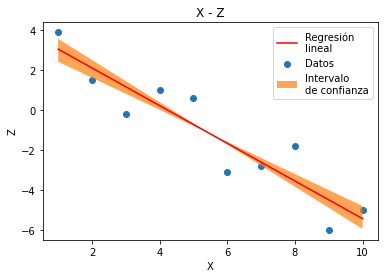

In [8]:
# Intervalos de confianza
z_t1 = ( ( lin_reg.slope - t_sb_z )
    * ( x - x.mean() ) + z.mean() )
z_t2 = ( ( lin_reg.slope + t_sb_y )
    * ( x - x.mean() ) + z.mean() )

fig, ax = plt.subplots()

# Se grafican los valores.
ax.scatter(x, z)
ax.plot(x, z_reg, color = "r")
ax.fill_between(x, z_t1, z_t2, alpha = 0.7)

ax.set_title("X - Z")
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.legend(["Regresión\nlineal",
    "Datos", "Intervalo\nde confianza"])